In [1]:
# Import Dependencies

import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt



In [2]:
# Read in csv

df = pd.read_csv("./Data/cgr-premiums-table-2.csv")

In [3]:
df.head()

,territory,gender,birthdate,ypc,current_premium,indicated_premium,selected_premium,underlying_premium,fixed_expenses,underlying_total_premium,cgr_factor,cgr
0,601,M,10/5/1947,0,863.97,830.58,862.57,673.06,175.98,849.04,1.02,ZHK
1,601,F,7/6/1953,0,828.63,611.14,826.43,612.75,175.98,788.73,1.06,6NS
2,601,M,4/18/1956,0,1000.59,593.99,996.60,858.20,175.98,1034.18,0.96,Z2D
3,601,F,8/16/1956,0,700.42,547.95,697.84,571.49,180.48,751.97,0.91,D7G
4,601,F,1/23/1957,0,505.92,448.33,504.56,333.71,152.08,485.79,1.06,3YN


In [4]:
df = df[["birthdate", "gender", "current_premium", "indicated_premium"]]

df.head()

,birthdate,gender,current_premium,indicated_premium
0,10/5/1947,M,863.97,830.58
1,7/6/1953,F,828.63,611.14
2,4/18/1956,M,1000.59,593.99
3,8/16/1956,F,700.42,547.95
4,1/23/1957,F,505.92,448.33


In [5]:
# Convert birthdate to age in the year 2013 (year data was collected)


df['age_2013'] = (pd.to_datetime('1/1/2013') - pd.to_datetime(df['birthdate']))/np.timedelta64(1,'D')/365.25
df['age_2013'] = df['age_2013'].round()
df['age_2013'] = df['age_2013'].astype(int)


df.head()




,birthdate,gender,current_premium,indicated_premium,age_2013
0,10/5/1947,M,863.97,830.58,65
1,7/6/1953,F,828.63,611.14,59
2,4/18/1956,M,1000.59,593.99,57
3,8/16/1956,F,700.42,547.95,56
4,1/23/1957,F,505.92,448.33,56


In [6]:
youngest = df["age_2013"].min()
print(youngest)

oldest = df["age_2013"].max()
print(oldest)


16
113


In [7]:
df = df.loc[df["age_2013"] != 113]

df

,birthdate,gender,current_premium,indicated_premium,age_2013
0,10/5/1947,M,863.97,830.58,65
1,7/6/1953,F,828.63,611.14,59
2,4/18/1956,M,1000.59,593.99,57
3,8/16/1956,F,700.42,547.95,56
4,1/23/1957,F,505.92,448.33,56
...,...,...,...,...,...
92787,7/2/1988,M,572.43,770.65,25
92788,11/9/1988,F,794.44,777.57,24
92789,5/17/1989,F,847.40,1192.51,24
92790,7/16/1990,M,1184.31,1459.55,22


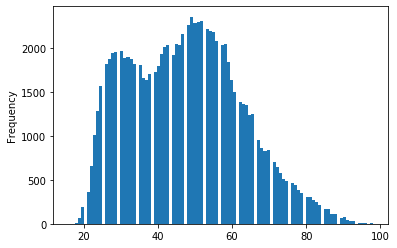

In [8]:
# Create the histogram
df["age_2013"].plot(kind="hist", bins=100)

# Show the plot
plt.show()

Number of outliers: 7


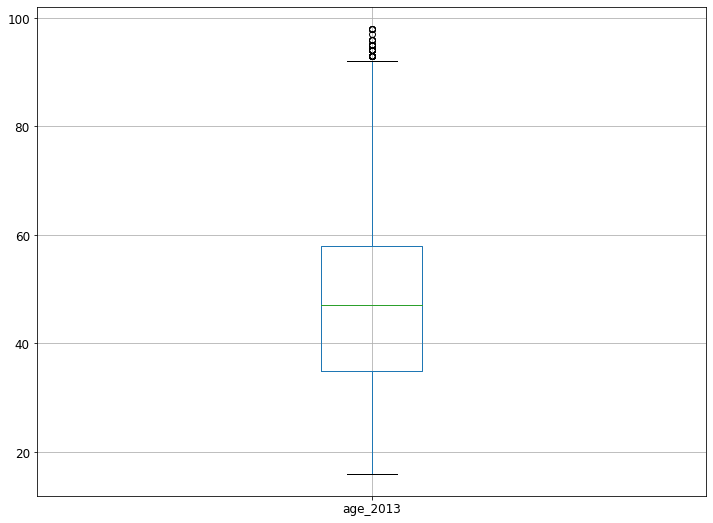

In [9]:


df.boxplot(column="age_2013", figsize=(12, 9), fontsize=12)


ax = plt.gca()
lines = ax.get_lines()

outliers = 0
for line in lines:
    if line.get_xdata().size > 0:
        outliers += 1
        
print(f"Number of outliers: {outliers}")

# Show the plot
plt.show()



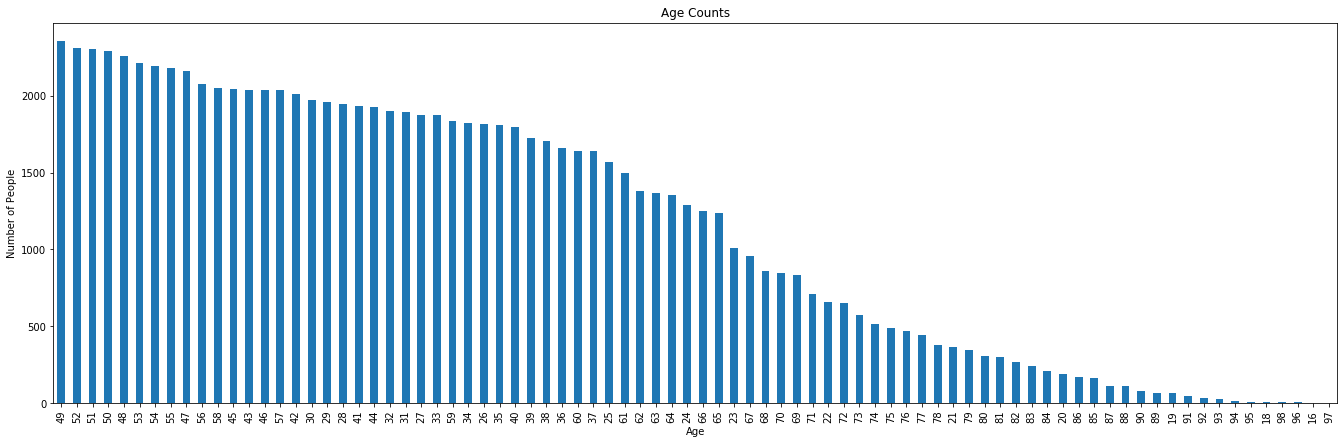

In [10]:
# Get the value counts for the age_2013 column
age_counts = df["age_2013"].value_counts()

# Create the bar chart
age_counts.plot(kind="bar", figsize=(23, 7), title="Age Counts")

plt.xlabel("Age")
plt.ylabel("Number of People")

# Show the plot
plt.show()

In [11]:
# Create the bins and labels
bins = [16, 19, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ["16-19", "19-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75", "75-80", "80-85", "85-90", "90-95", "95-100"]

# Cut the age_2013 column and put it into the specified bins
df["age_group"] = pd.cut(df["age_2013"], bins=bins, labels=labels)

df.head()

,birthdate,gender,current_premium,indicated_premium,age_2013,age_group
0,10/5/1947,M,863.97,830.58,65,60-65
1,7/6/1953,F,828.63,611.14,59,55-60
2,4/18/1956,M,1000.59,593.99,57,55-60
3,8/16/1956,F,700.42,547.95,56,55-60
4,1/23/1957,F,505.92,448.33,56,55-60


In [12]:
group_counts = df["age_group"].value_counts()
group_counts

50-55     11206
45-50     11112
40-45      9960
55-60      9641
25-30      9572
30-35      9301
35-40      8532
60-65      6839
19-25      5071
65-70      4743
70-75      2937
75-80      1939
80-85      1183
85-90       542
90-95       132
16-19        71
95-100        9
Name: age_group, dtype: int64

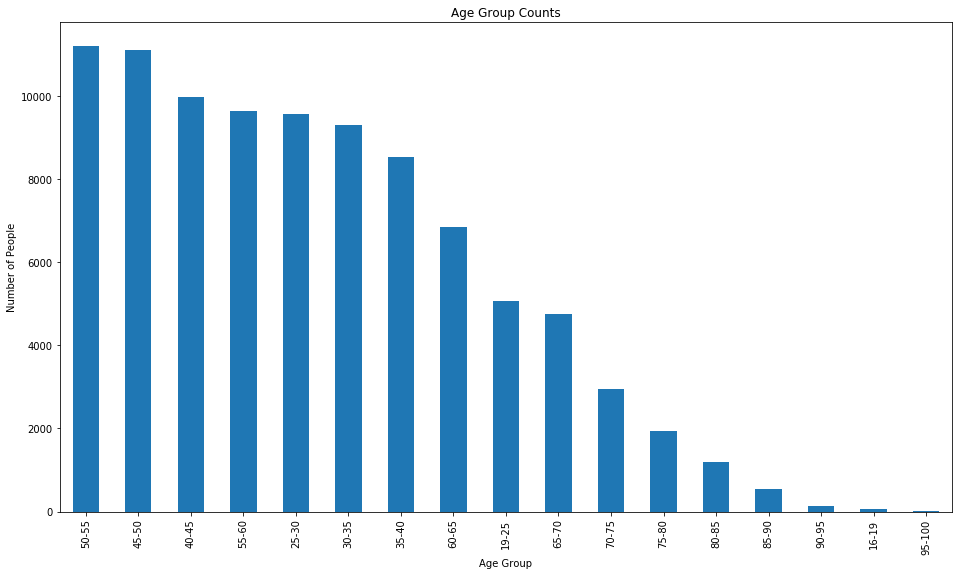

In [13]:
plt.xlabel("Age Group")
plt.ylabel("Number of People")


# Create a bar chart of the counts
group_counts.plot(kind="bar", figsize=(16, 9), title="Age Group Counts")

plt.show()

In [14]:
# Group the DataFrame by the age_group column
df_grouped = df.groupby("age_group")

# Apply an aggregation function to the grouped data
df_grouped_median = df_grouped.median()

df_grouped_median = df_grouped_median[["current_premium", "indicated_premium"]]

# Sort the DataFrame by the age_group column
df_grouped_median = df_grouped_median.sort_values(by="age_group")

df_grouped_median

,current_premium,indicated_premium
age_group,,
16-19,866.190,916.450
19-25,797.390,916.540
25-30,787.415,874.385
30-35,833.810,879.600
35-40,873.735,911.630
40-45,910.880,943.485
45-50,976.855,976.590
50-55,956.865,946.970
55-60,903.680,871.870


Correlation factor: 0.903


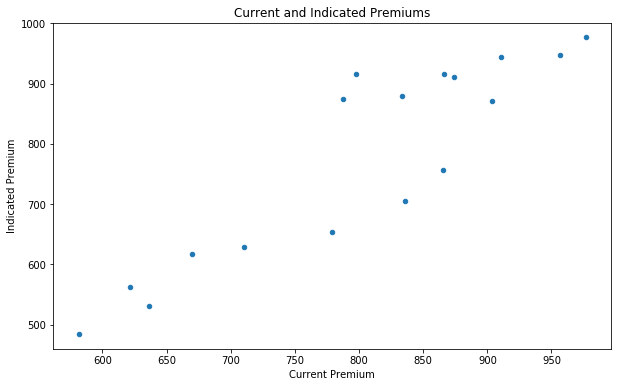

In [15]:
# Use the DataFrame.plot.scatter() method to create a scatter plot
df_grouped_median.plot.scatter('current_premium', 'indicated_premium', figsize=(10, 6))

# Add labels to the x-axis and y-axis, and add a title to the figure
plt.xlabel('Current Premium')
plt.ylabel('Indicated Premium')
plt.title('Current and Indicated Premiums')

# Calculate the correlation factor between the current_premium and indicated_premium columns
corr = df_grouped_median['current_premium'].corr(df_grouped_median['indicated_premium'])

# Round the correlation factor to 3 decimal places and print it
corr_rounded = round(corr, 3)
print('Correlation factor:', corr_rounded)

# Show the figure
plt.show()

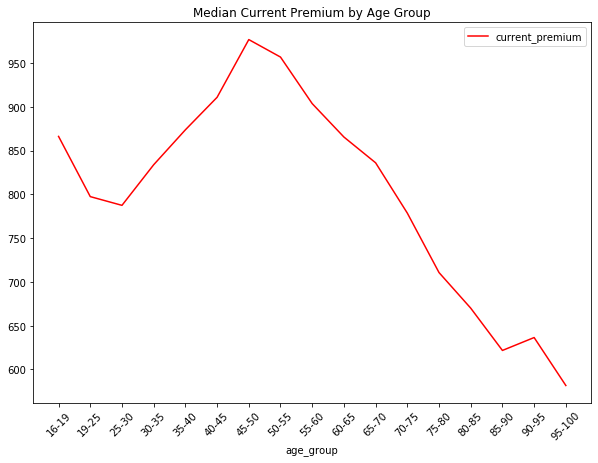

In [16]:
ax = df_grouped_median.plot(y="current_premium", figsize=(10, 7), color="red", title="Median Current Premium by Age Group")

# Set the x-axis tick labels to the index of the DataFrame

ax.set_xticklabels(df_grouped_median.index, rotation=45)

ax.set_xticks(np.arange(len(df_grouped_median.index)))

ax.set_xticklabels(df_grouped_median.index, rotation = 45)

# Show the plot
plt.show()

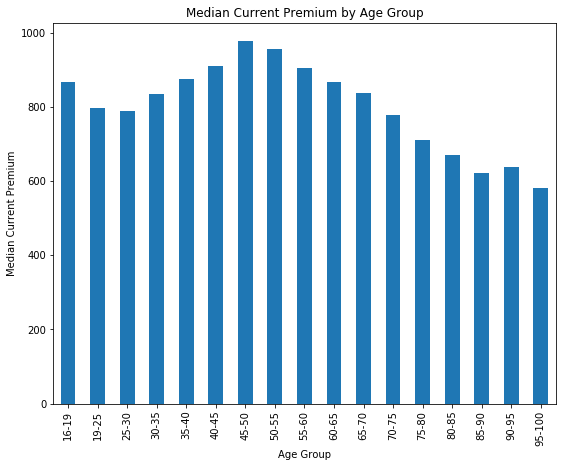

In [17]:
# Set the size of the figure
plt.figure(figsize=(9, 7))

# Create the bar chart
df_grouped_median["current_premium"].plot(kind="bar")

# Set the title and labels
plt.title("Median Current Premium by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Current Premium")

# Show the plot
plt.show()

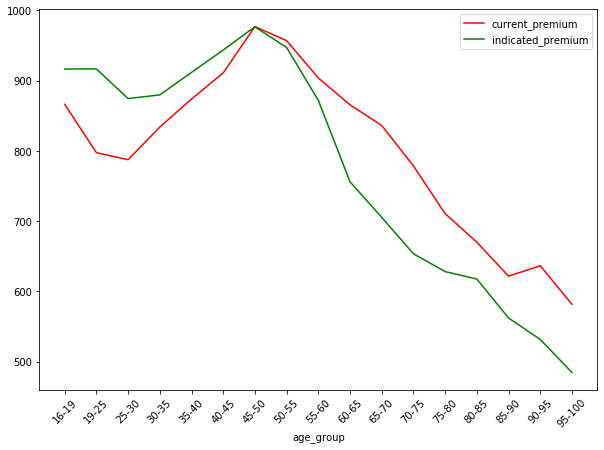

In [18]:
# Create the plot
ax = df_grouped_median.plot(y=["current_premium", "indicated_premium"], kind="line", figsize=(10, 7), color=["red", "green"])

# Set the tick locations and labels
ax.set_xticks(np.arange(len(df_grouped_median.index)))
ax.set_xticklabels(df_grouped_median.index, rotation=45)

# Show the plot
plt.show()


<Figure size 1080x936 with 0 Axes>

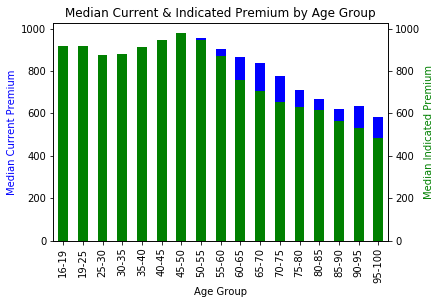

In [19]:

# Set the size of the figure
plt.figure(figsize=(15, 13))

# Create a subplot with two y axes
fig, ax1 = plt.subplots()

# Create the first bar chart using the first y axis
df_grouped_median["current_premium"].plot(kind="bar", color="blue", ax=ax1)

# Set the title and labels for the first y axis
ax1.set_title("Median Current & Indicated Premium by Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Median Current Premium", color="blue")

# Create the second y axis
ax2 = ax1.twinx()

# Create the second bar chart using the second y axis
df_grouped_median["indicated_premium"].plot(kind="bar", color="green", ax=ax2)

# Set the labels for the second y axis
ax2.set_ylabel("Median Indicated Premium", color="green")

# Show the plot
plt.show()

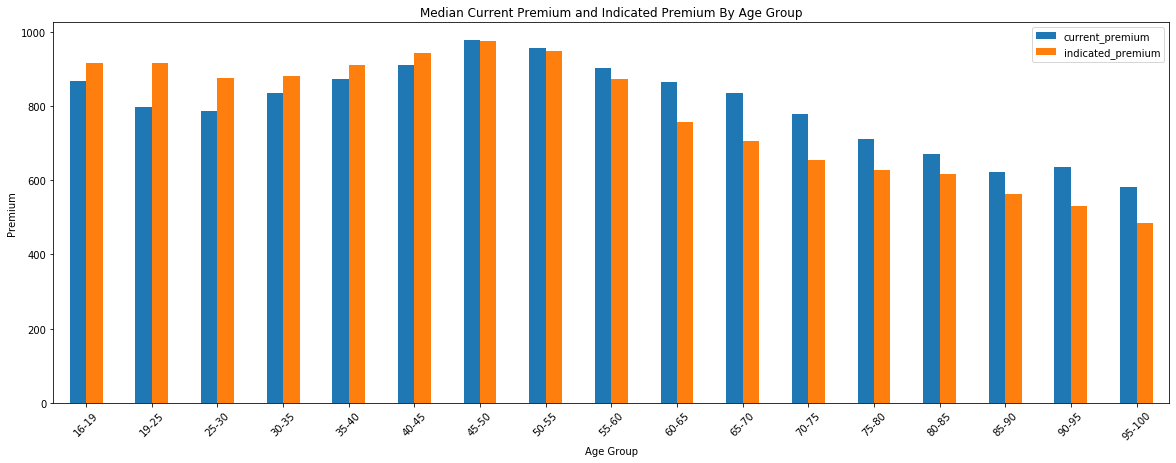

<Figure size 432x288 with 0 Axes>

In [20]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = df_grouped_median.plot(kind="bar", figsize=(20,7))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(df_grouped_median.index, rotation=45)

plt.title("Median Current Premium and Indicated Premium By Age Group")
plt.xlabel("Age Group")
plt.ylabel("Premium")

plt.show()
plt.tight_layout()


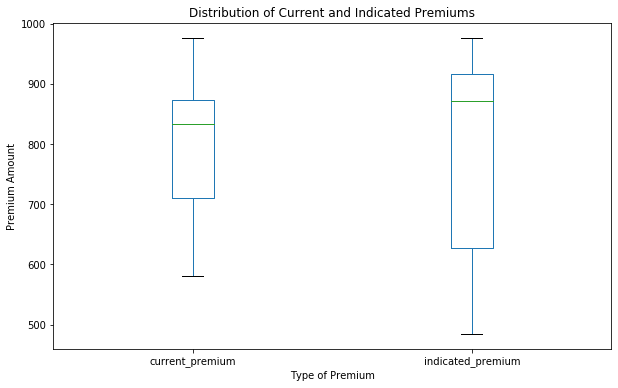

In [21]:
df_grouped_median.plot.box(["current_premium", "indicated_premium"], figsize=(10, 6))

# Add labels to the x-axis and y-axis, and add a title to the figure
plt.xlabel('Type of Premium')
plt.ylabel('Premium Amount')
plt.title('Distribution of Current and Indicated Premiums')

# Show the figure
plt.show()

In [22]:
gender_data = df["gender"]

gender_data_counts = gender_data.value_counts()

gender_data_counts

M    53234
F    39557
Name: gender, dtype: int64

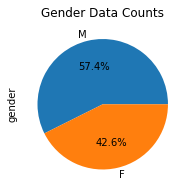

In [23]:
gender_data_counts.plot.pie(figsize=(3, 3), autopct='%1.1f%%')

# Add a title to the figure
plt.title('Gender Data Counts')

# Show the figure
plt.show()

In [24]:
gender_counts = df.groupby("age_group")["gender"].value_counts()

gender_counts

age_group  gender
16-19      M           36
           F           35
19-25      M         2653
           F         2418
25-30      M         5441
           F         4131
30-35      M         5522
           F         3779
35-40      M         5196
           F         3336
40-45      M         5859
           F         4101
45-50      M         6451
           F         4661
50-55      M         6259
           F         4947
55-60      M         5477
           F         4164
60-65      M         3825
           F         3014
65-70      M         2775
           F         1968
70-75      M         1690
           F         1247
75-80      M         1082
           F          857
80-85      M          636
           F          547
85-90      F          283
           M          259
90-95      M           71
           F           61
95-100     F            7
           M            2
Name: gender, dtype: int64

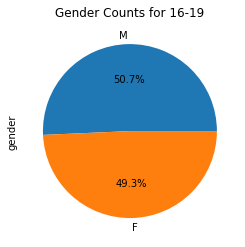

In [25]:
gender_counts_first_age_group = gender_counts.loc[gender_counts.index.get_level_values('age_group')[0]]

# Use the DataFrame.plot.pie() method to create a pie chart
gender_counts_first_age_group.plot.pie(figsize=(4, 4),  autopct='%1.1f%%')

# Add a title to the figure
plt.title('Gender Counts for 16-19')

# Show the figure
plt.show()

In [26]:
males = df.loc[df["gender"] == "M"]

females = df.loc[df["gender"] == "F"]



In [27]:
males_grouped_median = males.groupby("age_group").median()

males_grouped = males_grouped_median[["current_premium", "indicated_premium"]]

males_grouped

,current_premium,indicated_premium
age_group,,
16-19,895.440,852.730
19-25,798.990,903.730
25-30,792.290,874.240
30-35,849.140,879.200
35-40,870.560,902.825
40-45,915.260,948.800
45-50,1001.890,990.090
50-55,1018.890,997.740
55-60,960.300,921.750


In [28]:
females_grouped_median = females.groupby("age_group").median()

females_grouped = females_grouped_median[["current_premium", "indicated_premium"]]

females_grouped

,current_premium,indicated_premium
age_group,,
16-19,836.000,928.720
19-25,796.090,930.920
25-30,782.220,874.570
30-35,812.480,882.920
35-40,881.465,922.590
40-45,907.240,933.660
45-50,949.390,957.780
50-55,891.350,890.110
55-60,835.105,821.240


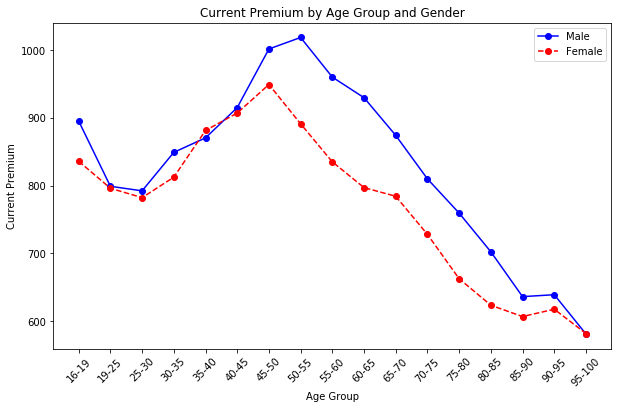

In [46]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(males_grouped["current_premium"], marker='o', linestyle='-', color='blue', label='Males')
ax.plot(females_grouped["current_premium"], marker='o', linestyle='--', color='red', label='Females')

ax.set_xticklabels(males_grouped.index, rotation=45)

ax.legend(labels=["Male", "Female"])

ax.set_xlabel('Age Group')
ax.set_ylabel('Current Premium')
ax.set_title('Current Premium by Age Group and Gender')


plt.show()

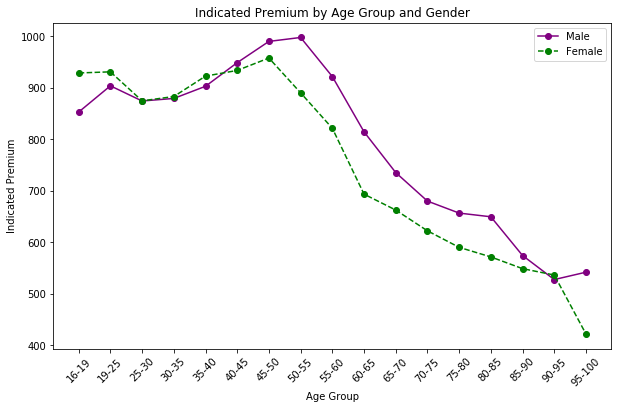

In [47]:

fig, ax2 = plt.subplots(figsize=(10, 6))

ax2.plot(males_grouped["indicated_premium"], marker='o', linestyle='-', color='purple', label='Males')
ax2.plot(females_grouped["indicated_premium"], marker='o', linestyle='--', color='green', label='Females')

ax2.set_xticklabels(males_grouped.index, rotation=45)

ax2.legend(labels=["Male", "Female"])

ax2.set_xlabel('Age Group')
ax2.set_ylabel('Indicated Premium')
ax2.set_title('Indicated Premium by Age Group and Gender')


plt.show()